In [7]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv("boston.csv")
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
print(df.columns)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


In [9]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

In [15]:
metrics = {
    "Linear Regression": {
        "R2 Score": r2_score(y_test, y_pred_lin),
        "MSE": mean_squared_error(y_test, y_pred_lin)
    },
    "Ridge Regression": {
        "R2 Score": r2_score(y_test, y_pred_ridge),
        "MSE": mean_squared_error(y_test, y_pred_ridge)
    }
}
for model, scores in metrics.items():
    print(f"{model}: R² Score = {scores['R2 Score']:.4f}, MSE = {scores['MSE']:.4f}")

Linear Regression: R² Score = 0.6688, MSE = 24.2911
Ridge Regression: R² Score = 0.6662, MSE = 24.4772


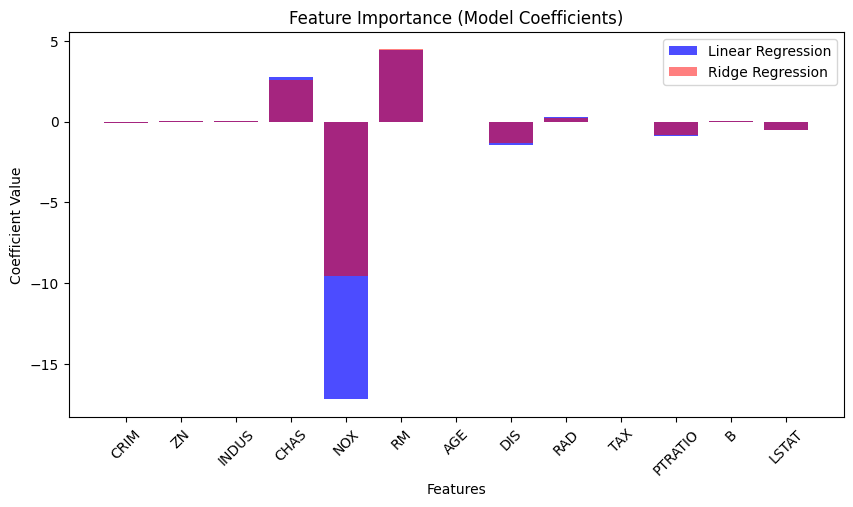

In [19]:
plt.figure(figsize=(10, 5))
plt.bar(X.columns, lin_reg.coef_, color='b', alpha=0.7, label='Linear Regression')
plt.bar(X.columns, ridge_reg.coef_, color='r', alpha=0.5, label='Ridge Regression')
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Model Coefficients)")
plt.legend()
plt.show()

predictions = pd.DataFrame({"Actual": y_test, "Linear_Predicted": y_pred_lin, "Ridge_Predicted": y_pred_ridge})
predictions.to_csv("house_price_predictions.csv", index=False)